Our Groups Goal!

Label + Data Integrity/ISRC

-number of streams by label

-country, year, registrant, random code

-use artist, title, songwriter to identify duplicate ISRC

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

Might as well just upload those because that what you do in python.
Our team is  data integrity issues (isrc) / label.

In [30]:
%matplotlib inline

In [31]:
music_df = pd.read_csv("../data/NSS-Sample.csv")

In [32]:
music_df = music_df.rename(columns={"If ":"ISRC"})

In [33]:
music_df.head()

,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,"10,175",Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,"62,105",Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0


In [34]:
music_df.isnull().sum()

ISRC                                         1760
Country Code                                 1697
Registrant Code                              1697
Year of Reference                            1761
Usage Period                                 8102
Streaming Platform (DSP)                     3999
Streams                                         0
Recording Artist                                0
Recording Label                              1008
Recording Title                                 0
Release Title                                  69
Recording Duration (Seconds)                    0
Songwriter's Listed (1 = "Yes", 0 = "No")       0
dtype: int64

In [35]:
music_df["ISRC"].fillna("", inplace = True)
music_df["Country Code"].fillna("", inplace = True)
music_df["Registrant Code"].fillna("", inplace = True)
music_df["Year of Reference"].fillna("", inplace = True)
music_df["Usage Period"].fillna("", inplace = True)
music_df["Streaming Platform (DSP)"].fillna("", inplace = True)
music_df["Streams"].fillna("", inplace = True)
music_df["Recording Artist"].fillna("", inplace = True)
music_df["Recording Label"].fillna("", inplace = True)
music_df["Recording Title"].fillna("", inplace = True)
music_df["Release Title"].fillna("", inplace = True)
music_df["Recording Duration (Seconds)"].fillna("", inplace = True)

In [36]:
music_df.isnull().sum()

ISRC                                         0
Country Code                                 0
Registrant Code                              0
Year of Reference                            0
Usage Period                                 0
Streaming Platform (DSP)                     0
Streams                                      0
Recording Artist                             0
Recording Label                              0
Recording Title                              0
Release Title                                0
Recording Duration (Seconds)                 0
Songwriter's Listed (1 = "Yes", 0 = "No")    0
dtype: int64

In [37]:
music_df=music_df.set_axis(["ISRC","Country","Registrant","Year","Month_Streamed",
                            "Platform","Streams","Artist","Label","Recording_Title","Release_Title",
                            "Duration_Sec","Songwriter_Listed"], axis=1)

In [38]:
music_df['Streams'] = music_df['Streams'].astype(str)
music_df['Streams']=music_df['Streams'].str.replace(',','')
music_df['Streams'] = music_df['Streams'].astype(int)

So we're having an extrordinarily difficult time turning the years column into an integer. Why is this an impossible feat? Why does it refuse to turn into a string even though there are no nulls? Why does it refuse to turn into a float when there are no nulls???

In [39]:
indie = music_df[music_df['Artist'] == music_df['Label']]

In [40]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ISRC               100000 non-null  object
 1   Country            100000 non-null  object
 2   Registrant         100000 non-null  object
 3   Year               100000 non-null  object
 4   Month_Streamed     100000 non-null  object
 5   Platform           100000 non-null  object
 6   Streams            100000 non-null  int32 
 7   Artist             100000 non-null  object
 8   Label              100000 non-null  object
 9   Recording_Title    100000 non-null  object
 10  Release_Title      100000 non-null  object
 11  Duration_Sec       100000 non-null  int64 
 12  Songwriter_Listed  100000 non-null  int64 
dtypes: int32(1), int64(2), object(10)
memory usage: 9.5+ MB


In [17]:
music_df.describe()

,Streams,Duration_Sec,Songwriter_Listed
count,1.000000e+05,100000.000000,100000.000000
mean,5.626550e+04,1016.893690,0.541610
std,2.620276e+05,15565.692133,0.498268
min,1.000000e+00,0.000000,0.000000
25%,6.807000e+03,149.000000,0.000000
50%,1.677250e+04,190.000000,1.000000
75%,3.990300e+04,236.000000,1.000000
max,2.145617e+07,818738.000000,1.000000


In [18]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ISRC               100000 non-null  object
 1   Country            100000 non-null  object
 2   Registrant         100000 non-null  object
 3   Year               100000 non-null  object
 4   Month_Streamed     100000 non-null  object
 5   Platform           100000 non-null  object
 6   Streams            100000 non-null  int32 
 7   Artist             100000 non-null  object
 8   Label              100000 non-null  object
 9   Recording_Title    100000 non-null  object
 10  Release_Title      100000 non-null  object
 11  Duration_Sec       100000 non-null  int64 
 12  Songwriter_Listed  100000 non-null  int64 
dtypes: int32(1), int64(2), object(10)
memory usage: 9.5+ MB


In [19]:
print(music_df.nlargest(n=20, columns=['Streams']))

               ISRC Country Registrant  Year Month_Streamed    Platform  \
46643  USAT21901833      US        AT2  19.0       4/1/2021     Spotify   
89141  TCAEW2013140      TC        AEW  20.0       4/1/2021       Apple   
24773  USUG12003339      US        UG1  20.0       1/1/2021     Spotify   
48604  QM4DW1706229      QM        4DW  17.0       3/1/2021       Apple   
27720  USUM72104713      US        UM7  21.0                      Apple   
52503  QZNJV2050806      QZ        NJV  20.0       5/1/2021     Spotify   
55656  TCADQ1824662      TC        ADQ  18.0       5/1/2021     Spotify   
65920  QZHN82036983      QZ        HN8  20.0       1/1/2021     Pandora   
89142  UKP3G2001318      UK        P3G  20.0       4/1/2021       Apple   
66711  USKBB2100008      US        KBB  21.0       4/1/2021  SoundCloud   
7949                                               3/1/2021       Apple   
70356  CAWHO2028607      CA        WHO  20.0       1/1/2021       Apple   
69799  USCGJ1409314      

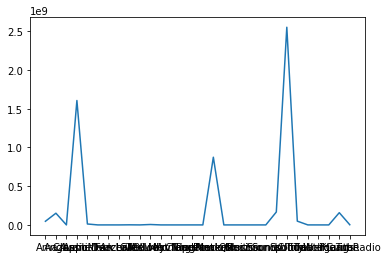

In [20]:
platform_sums = music_df.groupby('Platform')['Streams'].sum()
platform_sums.columns = ['Platform','Streams']
plt.plot(platform_sums)

C:\Users\phili\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


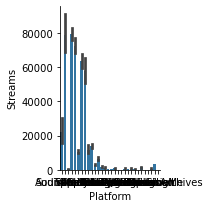

In [21]:
grid = sns.FacetGrid(music_df)
grid.map(sns.barplot, 'Platform', 'Streams')

In [22]:
print(platform_sums)

Platform
                      4.703908e+07
Amazon                1.511998e+08
Anghami               3.468200e+04
Apple                 1.606454e+09
AudioMack             1.199156e+07
Classical Archives    2.000000e+01
Deezer                8.783000e+04
Fan Label             9.100000e+01
GTL                   1.280764e+06
LiveXLive             1.013070e+05
Melodyv               5.384657e+06
Midwest Tape          8.570800e+04
MixCloud              2.661000e+03
MonkingMe             3.549000e+03
NugsNet               1.107090e+05
Pacemaker             1.707000e+03
Pandora               8.742366e+08
PowerMusic            3.154000e+03
Qoboz                 6.621000e+03
Recisio               2.900000e+01
Smithsonian           2.080000e+02
Sonos                 3.140200e+04
SoundCloud            1.668138e+08
Spotify               2.552564e+09
Tidal                 4.879313e+07
Trebel                1.493470e+05
Ultimate Guitar       3.090000e+02
Wolfgangs             9.650000e+02
YouTube    

dataframe1 = pd.DataFrame(data={"column1": [1, 2, 3, 4, 5]})
dataframe2 = pd.DataFrame(data={"column1": [1, 2]})

common = dataframe1.merge(dataframe2, on=["column1"])
result = dataframe1[~dataframe1.column1.isin(common.column1)]

In [23]:
indie_check1 = indie.merge(not_indie, on=['Artist'])

In [24]:
indie_check2 = indie[indie['Artist'].isin(indiecheck1['Artist'])]

NameError: name 'indiecheck1' is not defined

In [25]:
music_df.groupby(['Platform']).Streams.sum()

Platform
                      4.703908e+07
Amazon                1.511998e+08
Anghami               3.468200e+04
Apple                 1.606454e+09
AudioMack             1.199156e+07
Classical Archives    2.000000e+01
Deezer                8.783000e+04
Fan Label             9.100000e+01
GTL                   1.280764e+06
LiveXLive             1.013070e+05
Melodyv               5.384657e+06
Midwest Tape          8.570800e+04
MixCloud              2.661000e+03
MonkingMe             3.549000e+03
NugsNet               1.107090e+05
Pacemaker             1.707000e+03
Pandora               8.742366e+08
PowerMusic            3.154000e+03
Qoboz                 6.621000e+03
Recisio               2.900000e+01
Smithsonian           2.080000e+02
Sonos                 3.140200e+04
SoundCloud            1.668138e+08
Spotify               2.552564e+09
Tidal                 4.879313e+07
Trebel                1.493470e+05
Ultimate Guitar       3.090000e+02
Wolfgangs             9.650000e+02
YouTube    

Having a really tough time just trying to make a bar chart with the info we have here.

C:\Users\phili\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


TypeError: unhashable type: 'numpy.ndarray'

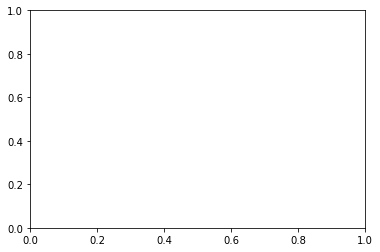

In [28]:
plt.plot(music_df.groupby('Platform'), music_df.groupby('Platform')['Streams'].sum(),kind='bar')